In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importing all datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads_data.shape

(9240, 37)

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Handle "select"
leads_data.replace(to_replace ="Select", 
                 value = np.nan,inplace=True) 

In [8]:
data_missing = leads_data.isnull().sum()

In [9]:
data_missing / len(leads_data)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [10]:
#drop columns which have 40% of the data missing

In [11]:
leads_data.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education'], axis = 1, inplace = True)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
data_missing = leads_data.isnull().sum()
data_missing/len(leads_data)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [13]:
leads_data['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [15]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [16]:
# this column is skewed,hence we will drop it
leads_data.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [17]:
leads_data['Lead Profile'].value_counts(normalize = True)

Potential Lead                 0.676310
Other Leads                    0.204193
Student of SomeSchool          0.101048
Lateral Student                0.010063
Dual Specialization Student    0.008386
Name: Lead Profile, dtype: float64

In [18]:
print(leads_data['Lead Profile'].isnull().sum())

6855


In [19]:
# DROP LEADS PROFILE AS 74% OF THE DATA IS MISSING
leads_data.drop(['Lead Profile'],axis = 1,inplace = True)

In [20]:
data_missing = leads_data.isnull().sum()
data_missing/len(leads_data)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.003896
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Country                                     0.266342
Specialization                              0.365801
What is your current occupation             0.291126
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

In [21]:
leads_data['City'].value_counts(normalize = True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [22]:
leads_data['City']= leads_data['City'].replace(['Other Cities of Maharashtra','Other Metro Cities',
                                                               'Tier II Cities'],'Other Cities',)
leads_data['City'].value_counts(normalize = True)

Mumbai               0.578352
Other Cities         0.286663
Thane & Outskirts    0.134985
Name: City, dtype: float64

In [23]:
leads_data['City'].isnull().sum()

3669

In [24]:
#replace missing values with Mode
leads_data['City'].fillna('Mumbai', inplace=True)
leads_data['City'].isnull().sum()

0

In [25]:
leads_data['Specialization'].value_counts(normalize = True)
leads_data['Specialization']= leads_data['Specialization'].replace(['Healthcare Management','Hospitality Management','E-COMMERCE',
                                                                   'Retail Management','Rural and Agribusiness','E-Business',
                                                                   'Services Excellence'],'Other')

leads_data['Specialization'].fillna('Finance Management', inplace=True)
leads_data['Specialization'].value_counts(normalize = True)

Finance Management                   0.471429
Human Resource Management            0.091775
Marketing Management                 0.090693
Other                                0.070887
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Name: Specialization, dtype: float64

In [26]:
leads_data['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [27]:
# Drop this variable as 85% is unemployed
leads_data.drop(['What is your current occupation'],axis =1,inplace = True)

In [28]:
leads_data['Country'].value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Germany                 0.000590
Sweden                  0.000443
Netherlands             0.000295
China                   0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Italy                   0.000295
Bangladesh              0.000295
Philippines             0.000295
Belgium                 0.000295
Kenya                   0.000148
Sri Lanka               0.000148
Russia    

In [29]:
#Skewed column hence we drop Countries
leads_data.drop(['Country'],axis = 1, inplace=True)

In [30]:
data_missing = leads_data.isnull().sum()
data_missing/len(leads_data)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.003896
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Specialization                              0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [31]:
leads_data['Tags'].value_counts(normalize = True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [32]:
leads_data['Tags']= leads_data['Tags'].replace(['Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education',
                                               'Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)',
                                               'wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others',
                                               'Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP',
                                               'Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized',
                                               'Recognition issue (DEC approval)'],'Other')

In [33]:
leads_data['Tags'].value_counts(normalize = True)

Will revert after reading the email    0.351962
Other                                  0.277561
Ringing                                0.204349
Interested in other courses            0.087141
Already a student                      0.078988
Name: Tags, dtype: float64

In [34]:
leads_data['Tags'].isnull().sum()

3353

In [35]:
#Replacing missing values with Mode
leads_data['Tags'].fillna(value = 'Will revert after reading the email',inplace=True)
leads_data['Tags'].value_counts(normalize = True)

Will revert after reading the email    0.587121
Other                                  0.176840
Ringing                                0.130195
Interested in other courses            0.055519
Already a student                      0.050325
Name: Tags, dtype: float64

In [36]:
leads_data['TotalVisits'].value_counts(normalize = True) 

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
25.0     0.000549
24.0     0.000549
27.0     0.000549
22.0     0.000330
28.0     0.000220
29.0     0.000220
26.0     0.000220
115.0    0.000110
41.0     0.000110
55.0     0.000110
251.0    0.000110
141.0    0.000110
32.0     0.000110
42.0     0.000110
74.0     0.000110
43.0     0.000110
30.0     0.000110
54.0     0.000110
Name: TotalVisits, dtype: float64

In [37]:
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]

In [38]:
data_missing = leads_data.isnull().sum()
data_missing/len(leads_data)

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.003186
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.000000
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.000000
Last Activity                               0.000000
Specialization                              0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [39]:
#Missing Lead Source
leads_data=leads_data[~(leads_data['Lead Source'].isnull())]
data_missing = leads_data.isnull().sum()
data_missing/len(leads_data)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [40]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [41]:
leads_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [42]:
#Converting some binary variables (Yes/No) to 0/1

In [43]:

varlist =  ['Do Not Email', 'Do Not Call','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
           'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Update me on Supply Chain Content',
           'Get updates on DM Content','Search','Magazine','Newspaper Article','X Education Forums','Newspaper']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [44]:
leads_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [45]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

In [46]:
leads_data['Lead Source']= leads_data['Lead Source'].replace(['Facebook','bing','google','Click2call','Press_Release','Live Chat',
                                                             'Social Media','youtubechannel','Pay per Click Ads',
                                                             'NC_EDM','blog','WeLearn','testone','welearnblog_Home'],'Other')
leads_data['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Other                 59
Name: Lead Source, dtype: int64

In [47]:
leads_data['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [48]:
leads_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [49]:
leads_data['Last Activity']= leads_data['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation',
                                                                 'View in browser link Clicked','Approached upfront',
                                                                 'Email Received','Email Marked Spam','Resubscribed to emails',
                                                                 'Visited Booth in Tradeshow'],'Other')
leads_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Other                         101
Unreachable                    90
Name: Last Activity, dtype: int64

In [50]:
leads_data['Last Notable Activity'].value_counts()
#Drop Last Notable Activiy as it is similar to Last Activity
leads_data.drop(['Last Notable Activity'],axis = 1,inplace = True)

In [51]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Source','Last Activity','Lead Origin','City','Tags','Specialization']], drop_first=True)

# Adding the results to the master dataframe
leads_data= pd.concat([leads_data, dummy1], axis=1)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,1,0,0,0,0,0,0,0,0,0


In [52]:
leads_data = leads_data.drop(['Lead Source','Last Activity','Lead Origin','City','Tags','Specialization'], 1)
leads_data.head(5)

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [54]:
leads_data['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001A29A1BEB80>, <matplotlib.lines.Line2D object at 0x000001A29A1BEEE0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A29A223280>, <matplotlib.lines.Line2D object at 0x000001A29A2235E0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A29A1BE820>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A29A223940>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A29A223CA0>], 'means': []}


{'whiskers': [<matplotlib.lines.Line2D at 0x1a29a215490>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29a215b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29a215130>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29a23a250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29a23a5b0>],
 'means': []}

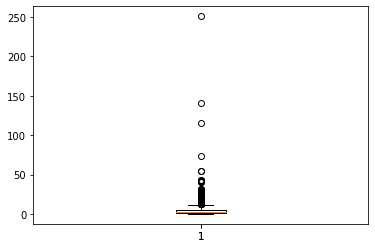

In [55]:
print(plt.boxplot(leads_data['TotalVisits']))
leads_data = leads_data[~(leads_data['TotalVisits']>50)]
plt.boxplot(leads_data['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a29aec3d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29aecf460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29aec3a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29aecfb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29aecfe80>],
 'means': []}

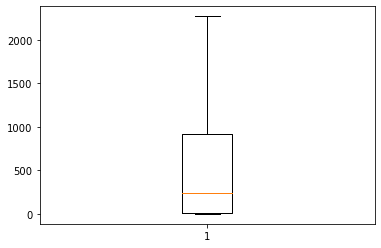

In [56]:
plt.boxplot(leads_data['Total Time Spent on Website'])

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001A29AF2A580>, <matplotlib.lines.Line2D object at 0x000001A29AF2A8E0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A29AF2AC40>, <matplotlib.lines.Line2D object at 0x000001A29AF2AFA0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A29AF2A220>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A29AF35340>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A29AF356A0>], 'means': []}


{'whiskers': [<matplotlib.lines.Line2D at 0x1a29af35d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1a29af41460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a29af358e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a29af41b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a29af41e80>],
 'means': []}

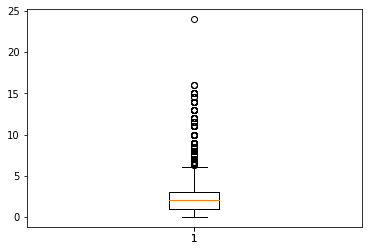

In [57]:
print(plt.boxplot(leads_data['Page Views Per Visit']))
leads_data = leads_data[~(leads_data['Page Views Per Visit']>15)]
plt.boxplot(leads_data['Page Views Per Visit'])

In [58]:
#Test-Train Split
from sklearn.model_selection import train_test_split

In [59]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Lead Number','Prospect ID'], axis=1)

X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9064 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9064 non-null   int64  
 1   Do Not Call                               9064 non-null   int64  
 2   TotalVisits                               9064 non-null   float64
 3   Total Time Spent on Website               9064 non-null   int64  
 4   Page Views Per Visit                      9064 non-null   float64
 5   Search                                    9064 non-null   int64  
 6   Magazine                                  9064 non-null   int64  
 7   Newspaper Article                         9064 non-null   int64  
 8   X Education Forums                        9064 non-null   int64  
 9   Newspaper                                 9064 non-null   int64  
 10  Digital Advertisement               

In [60]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
#Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2179,0,0,0.461143,-0.660914,1.281331,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3504,0,0,-0.110186,-0.096461,0.313855,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5038,0,0,1.889465,1.530493,0.071986,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3460,0,0,-0.395851,0.338869,-0.169883,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7422,0,0,0.461143,-0.576061,0.071986,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [65]:
### Checking the Conversion Rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

37.875110326566634

In [66]:
#Looking at Correlations

In [67]:
# Looking at Correlationsmporting matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
# Let's see the correlation matrix 
plt.figure(figsize = (200,100))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [69]:
# Model Building

In [70]:
import statsmodels.api as sm

In [71]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2276.2
Date:                Tue, 27 Dec 2022   Deviance:                       4552.5
Time:                        01:07:42   Pearson chi2:                 7.50e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.2875      1.060     -5.934      0.000      -8.364      -4.211
Do Not Email                                -1.6728      0.223     -7.498      0.000      -2.110      -1.236
Do Not Call                                 20.1539   1.93e+04      0.001      0.999   -3.78e+04    3.79e+04
TotalVisits                                  0.2752      0.052      5.272      0.000       0.173       0.377
Total Time Spent on Website                  1.1340      0.045     24.938      0.000       1.045       1.223
Page Views Per Visit                        -0.1928      0.058     -3.312      0.001      -0.307      -0.079
Search                                       0.4666      0.899      0.519      0.604      -1.296       2.229
Magazine                                  2.535e-12   6.79e-07   3.73e-06      1.000   -1.33e-06    1.33e-06
Newspaper Article                          -12.9349   1.45e+04     -0.001      0.999   -2.84e+04    2.84e+04
X Education Forums                         -12.9349   1.45e+04     -0.001      0.999   -2.84e+04    2.84e+04
Newspaper                                  -19.4328   2.91e+04     -0.001      0.999   -5.71e+04    5.71e+04
Digital Advertisement                       -0.6921      1.724     -0.402      0.688      -4.070       2.686
Through Recommendations                      3.8747      1.940      1.998      0.046       0.073       7.676
Receive More Updates About Our Courses   -6.347e-10    4.8e-07     -0.001      0.999   -9.41e-07     9.4e-07
Update me on Supply Chain Content        -8.439e-11   4.25e-07     -0.000      1.000   -8.33e-07    8.33e-07
Get updates on DM Content                -4.953e-10   4.07e-07     -0.001      0.999   -7.98e-07    7.97e-07
I agree to pay the amount through cheque -1.525e-09   1.44e-06     -0.001      0.999   -2.82e-06    2.81e-06
A free copy of Mastering The Interview      -0.1368      0.116     -1.175      0.240      -0.365       0.091
Lead Source_Google                           0.0361      0.124      0.291      0.771      -0.207       0.279
Lead Source_Olark Chat                       1.0239      0.174      5.898      0.000       0.684       1.364
Lead Source_Organic Search                   0.1602      0.143      1.122      0.262      -0.120       0.440
Lead Source_Other                           -0.3820      0.630     -0.607      0.544      -1.617       0.852
Lead Source_Reference                        2.5064      1.224      2.048      0.041       0.107       4.905
Lead Source_Referral Sites                   0.1153      0.351      0.329      0.742      -0.572       0.802
Lead Source_Welingak Website                 3.3521      1.399      2.396      0.017       0.610       6.095
Last Activity_Email Bounced    

In [72]:
#Feature Selection Using RFE

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)          
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False])

In [76]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Search', False, 15),
 ('Magazine', False, 34),
 ('Newspaper Article', False, 4),
 ('X Education Forums', False, 2),
 ('Newspaper', False, 16),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 33),
 ('Update me on Supply Chain Content', False, 32),
 ('Get updates on DM Content', False, 30),
 ('I agree to pay the amount through cheque', False, 31),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Other', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link

In [77]:
col = X_train.columns[rfe.support_]

In [78]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'City_Other Cities',
       'City_Thane & Outskirts', 'Tags_Interested in other courses',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Spec

In [79]:
#Assessing the model with StatsModels

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2302.0
Date:                Tue, 27 Dec 2022   Deviance:                       4604.1
Time:                        01:07:44   Pearson chi2:                 7.59e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7712      0.378    -12.630      0.000      -5.512      -4.031
Do Not Email                                -1.5843      0.192     -8.272      0.000      -1.960      -1.209
Total Time Spent on Website                  1.1354      0.045     25.280      0.000       1.047       1.223
Digital Advertisement                       -2.0544      1.490     -1.379      0.168      -4.975       0.866
Through Recommendations                      2.3201      1.520      1.527      0.127      -0.659       5.299
Lead Source_Olark Chat                       0.9210      0.126      7.287      0.000       0.673       1.169
Lead Source_Reference                        2.6981      1.176      2.294      0.022       0.393       5.003
Lead Source_Welingak Website                 3.4905      1.356      2.573      0.010       0.832       6.149
Last Activity_Email Opened                   0.7597      0.111      6.832      0.000       0.542       0.978
Last Activity_Olark Chat Conversation       -1.0392      0.189     -5.499      0.000      -1.410      -0.669
Last Activity_Other                          1.7446      0.366      4.769      0.000       1.028       2.462
Last Activity_SMS Sent                       2.0081      0.117     17.160      0.000       1.779       2.237
Last Activity_Unreachable                    1.1077      0.372      2.981      0.003       0.380       1.836
Lead Origin_Landing Page Submission         -0.4782      0.112     -4.278      0.000      -0.697      -0.259
Lead Origin_Lead Add Form                    1.4680      1.143      1.284      0.199      -0.772       3.708
Lead Origin_Lead Import                      1.1049      0.534      2.068      0.039       0.058       2.152
Tags_Other                                   3.5957      0.364      9.883      0.000       2.883       4.309
Tags_Ringing                                -0.1597      0.422     -0.378      0.705      -0.988       0.668
Tags_Will revert after reading the email     4.1755      0.358     11.661      0.000       3.474       4.877
Specialization_Finance Management           -0.6989      0.096     -7.245      0.000      -0.888      -0.510
Specialization_International Business       -0.3970      0.269     -1.474      0.140      -0.925       0.131
============================================================================================================
"""

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2179    0.216652
3504    0.008501
5038    0.520991
3460    0.375369
7422    0.255434
422     0.007588
5352    0.192410
7789    0.966733
8242    0.741713
1307    0.834479
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21665239, 0.00850133, 0.52099141, 0.37536853, 0.25543372,
       0.00758825, 0.19240995, 0.96673311, 0.74171271, 0.83447946])

In [83]:
#Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Lead Number
0,0,0.216652,2179
1,0,0.008501,3504
2,0,0.520991,5038
3,0,0.375369,3460
4,0,0.255434,7422
5,1,0.007588,422
6,0,0.192410,5352
7,1,0.966733,7789
8,1,0.741713,8242
9,1,0.834479,1307


In [85]:
#Creating new column 'predicted' with 1 if Conversion_Prob > 0.55 else 0

In [86]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.55 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.216652,2179,0
1,0,0.008501,3504,0
2,0,0.520991,5038,0
3,0,0.375369,3460,0
4,0,0.255434,7422,0
5,1,0.007588,422,0
6,0,0.192410,5352,0
7,1,0.966733,7789,1
8,1,0.741713,8242,1
9,1,0.834479,1307,1


In [87]:
from sklearn import metrics

In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3593  357]
 [ 647 1747]]


In [89]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8417402269861286


In [90]:
#Checking VIFs

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Origin_Lead Add Form,63.56
5,Lead Source_Reference,48.39
6,Lead Source_Welingak Website,16.27
17,Tags_Will revert after reading the email,4.74
12,Lead Origin_Landing Page Submission,3.44
7,Last Activity_Email Opened,2.83
10,Last Activity_SMS Sent,2.61
18,Specialization_Finance Management,2.53
4,Lead Source_Olark Chat,2.37
15,Tags_Other,1.99


In [93]:
#There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.

In [94]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Through Recommendations', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Specialization_Finance Management',
       'Specialization_International Business'],
      dtype='object')

In [95]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2303.1
Date:                Tue, 27 Dec 2022   Deviance:                       4606.2
Time:                        01:07:45   Pearson chi2:                 7.60e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.7602      0.378    -12.605      0.000      -5.500      -4.020
Do Not Email                                -1.5861      0.192     -8.282      0.000      -1.961      -1.211
Total Time Spent on Website                  1.1351      0.045     25.295      0.000       1.047       1.223
Digital Advertisement                       -2.0578      1.490     -1.381      0.167      -4.979       0.863
Through Recommendations                      2.3232      1.520      1.528      0.126      -0.656       5.302
Lead Source_Olark Chat                       0.9169      0.126      7.268      0.000       0.670       1.164
Lead Source_Reference                        4.1576      0.298     13.931      0.000       3.573       4.743
Lead Source_Welingak Website                 4.9525      0.737      6.723      0.000       3.509       6.396
Last Activity_Email Opened                   0.7581      0.111      6.826      0.000       0.540       0.976
Last Activity_Olark Chat Conversation       -1.0442      0.189     -5.528      0.000      -1.414      -0.674
Last Activity_Other                          1.7423      0.366      4.763      0.000       1.025       2.459
Last Activity_SMS Sent                       2.0063      0.117     17.158      0.000       1.777       2.236
Last Activity_Unreachable                    1.1047      0.372      2.973      0.003       0.377       1.833
Lead Origin_Landing Page Submission         -0.4895      0.112     -4.390      0.000      -0.708      -0.271
Lead Origin_Lead Import                      1.0955      0.534      2.050      0.040       0.048       2.143
Tags_Other                                   3.5979      0.364      9.888      0.000       2.885       4.311
Tags_Ringing                                -0.1574      0.422     -0.372      0.710      -0.985       0.671
Tags_Will revert after reading the email     4.1792      0.358     11.670      0.000       3.477       4.881
Specialization_Finance Management           -0.7057      0.096     -7.325      0.000      -0.894      -0.517
Specialization_International Business       -0.4002      0.269     -1.486      0.137      -0.928       0.128
============================================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [97]:
y_train_pred[:10]

array([0.21775743, 0.00850619, 0.52137459, 0.37543372, 0.2576809 ,
       0.00754053, 0.192231  , 0.96676551, 0.7419971 , 0.83528807])

In [98]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [99]:

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.217757,2179,0
1,0,0.008506,3504,0
2,0,0.521375,5038,0
3,0,0.375434,3460,0
4,0,0.257681,7422,0
5,1,0.007541,422,0
6,0,0.192231,5352,0
7,1,0.966766,7789,1
8,1,0.741997,8242,1
9,1,0.835288,1307,1


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8417402269861286


In [101]:
#Let's now check the VIFs again

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Tags_Will revert after reading the email,4.73
12,Lead Origin_Landing Page Submission,3.44
7,Last Activity_Email Opened,2.83
10,Last Activity_SMS Sent,2.61
17,Specialization_Finance Management,2.53
4,Lead Source_Olark Chat,2.37
14,Tags_Other,1.99
15,Tags_Ringing,1.86
8,Last Activity_Olark Chat Conversation,1.71
1,Total Time Spent on Website,1.35


In [103]:
#All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [104]:
#Finding Optimal Cutoff Point

In [105]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.217757,2179,0,1,1,1,0,0,0,0,0,0,0
1,0,0.008506,3504,0,1,0,0,0,0,0,0,0,0,0
2,0,0.521375,5038,0,1,1,1,1,1,1,0,0,0,0
3,0,0.375434,3460,0,1,1,1,1,0,0,0,0,0,0
4,0,0.257681,7422,0,1,1,1,0,0,0,0,0,0,0


In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377364  1.000000  0.000000
0.1   0.1  0.703184  0.975773  0.537975
0.2   0.2  0.758670  0.941520  0.647848
0.3   0.3  0.805328  0.900585  0.747595
0.4   0.4  0.845839  0.824561  0.858734
0.5   0.5  0.844893  0.769841  0.890380
0.6   0.6  0.837484  0.690894  0.926329
0.7   0.7  0.806274  0.563074  0.953671
0.8   0.8  0.771438  0.444027  0.969873
0.9   0.9  0.725095  0.295739  0.985316


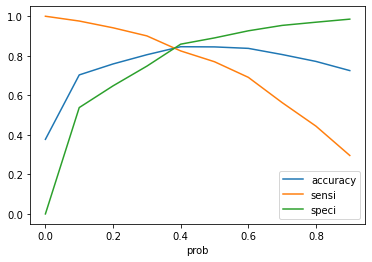

In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [108]:
#From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.217757,2179,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.008506,3504,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.521375,5038,0,1,1,1,1,1,1,0,0,0,0,1
3,0,0.375434,3460,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.257681,7422,0,1,1,1,0,0,0,0,0,0,0,0


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8458385876418664

In [111]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3392,  558],
       [ 420, 1974]], dtype=int64)

In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
 #the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7297410192147035

In [114]:
#The calculated specificity
TN / float(TN+FP)

0.909620253164557

In [115]:
# The false postive rate
print(FP/ float(TN+FP))

0.09037974683544303


In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.8303231939163498


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8474056603773585


In [118]:
#Plotting the ROC Curve

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

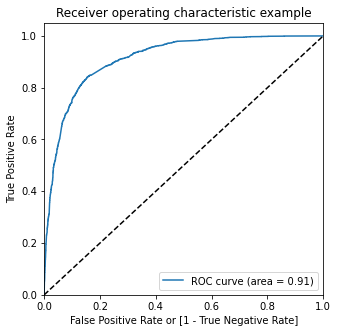

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [122]:
#Precision and Recall

In [123]:
Precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print(Precision)

0.8303231939163498


In [124]:
Recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(Recall)

0.7297410192147035


In [125]:
#Precision and recall tradeoff

In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6339    0
 6340    1
 6341    0
 6342    0
 6343    0
 Name: Converted, Length: 6344, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 Name: predicted, Length: 6344, dtype: int64)

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

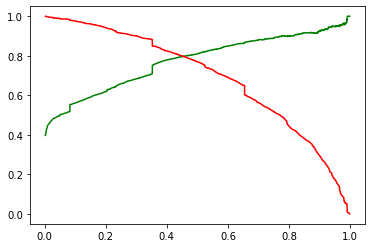

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
# taking 0.47 as the cutoff probability as per the above plot!

In [131]:
#Making predictions on the test set

In [132]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [133]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Digital Advertisement,Through Recommendations,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_SMS Sent,Last Activity_Unreachable,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Specialization_Finance Management,Specialization_International Business
5121,0,-0.808483,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
687,0,-0.201604,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4091,0,1.685441,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
738,0,0.864586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5231,0,-0.878579,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [134]:
X_test_sm = sm.add_constant(X_test)

In [135]:
y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

5121    0.140476
687     0.319207
4091    0.511308
738     0.424269
5231    0.654599
5395    0.915286
7615    0.004791
5295    0.003578
2258    0.931788
8683    0.301399
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
y_pred_1.head()

,0
5121,0.140476
687,0.319207
4091,0.511308
738,0.424269
5231,0.654599


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
y_test_df['Lead Number'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,5121,0.140476
1,0,687,0.319207
2,1,4091,0.511308
3,1,738,0.424269
4,1,5231,0.654599


In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [145]:
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob
0,0,5121,0.140476
1,0,687,0.319207
2,1,4091,0.511308
3,1,738,0.424269
4,1,5231,0.654599


In [146]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.47 else 0)

In [147]:
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob,final_predicted
0,0,5121,0.140476,0
1,0,687,0.319207,0
2,1,4091,0.511308,1
3,1,738,0.424269,0
4,1,5231,0.654599,1


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8580882352941176

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1494,  187],
       [ 199,  840]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
#the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8084696823869105

In [152]:
# The specificity
TN / float(TN+FP)

0.8887566924449732